In [ ]:
###FROM THE CONDA PROMPT, Setup in the case of CPU computing 

#git clone https://github.com/fastai/fastai.git
#git pull
#cd fastai
#conda env update -f environment-cpu.yml
#conda activate fastai-cpu
#conda uninstall pytorch
#conda install -c peterjc123 pytorch-cpu

In [ ]:
###FROM WINDOWS POWERSHELL Setting up the web scraper. If run from the conda environment, it may not work
#cd ../
#git clone https://github.com/hardikvasa/google-images-download.git
#cd google-images-download
#python setup.py install

In [ ]:
###FROM THE CONDA PROMPT Downloading chromedriver, needed to scrape more than 100 images
#cd google-images-download
#pip install requests
#python
#import requests
#import os
#import shutil
##Beginning chromedriver 2.37 download with requests. Update the URL if a new version of chromedriver is available')
#url = "https://chromedriver.storage.googleapis.com/2.37/chromedriver_win32.zip"
#r = requests.get(url)
""""
with open('.\\chromedriver.zip', 'wb') as f:  
    f.write(r.content)
""""
#shutil.unpack_archive('chromedriver.zip', '.\\')
#os.remove('.\\chromedriver.zip')
#quit()
#cd ..\\fastai
#conda activate fastai-cpu
#jupyter notebook

In [124]:
#Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import os

In [ ]:
######USER INPUT

#Indicate the current computer username
username="Perseo"

#Decide on the two categories you want
class1="Monkey animal" #Specifying reduces the number of inaccurate images
class2="Lemur animal"

#Name of the folder in which you want to place the images. Will be created in the fastai folder as default
namefolder="data"
PATH = f"C:\\Users\\{username}\\fastai\\{namefolder}"
sz=224

In [126]:
###Uncomment if you need to delete previous models and images:
##shutil.rmtree(PATH)

In [ ]:
#Downloading the images using the scraper. Can take a while
#-l parameter denotes the number of files desired. Note that if search is limited for image type (-f parameter) 
#the actual number of files downloaded is smaller

os.chdir(f"C:\\Users\\{username}\\fastai")
!googleimagesdownload -k "{class1}" -l 5000 -f "jpg" -o "{namefolder}" -cd "C:\\Users\\{username}\\google-images-download\\chromedriver.exe"
!googleimagesdownload -k "{class2}" -l 5000 -f "jpg" -o "{namefolder}" -cd "C:\\Users\\{username}\\google-images-download\\chromedriver.exe"

In [197]:
#Checking images are ok. Sometimes, they don't download correctly
from PIL import Image
def checkfiles(path, category):
    count=0
    for filename in os.listdir(os.path.join(path,category)):
        if filename[-4:]!=".jpg":
            os.remove(os.path.join(path,category,filename))
            count+=1
            continue
        try:
            im=Image.open(os.path.join(path,category,filename))
        except IOError:
            os.remove(os.path.join(path,category,filename))
            count+=1
    print(f"Files checked for {category}: {count} files deleted.")
checkfiles(PATH, class1)
checkfiles(PATH, class2)

Files checked for Monkey animal: 0 files deleted.
Files checked for Lemur animal: 0 files deleted.


In [200]:
#Dividing our images into training and validation
import random
def dividetrainvalid(path, percentage,category):#percentage is a value between 0 and 1
    os.makedirs(os.path.join(path,"valid",category))
    os.makedirs(os.path.join(path,"train",category))
    mainfolder = os.path.join(path,category)
    numfiles=0
    allfiles=os.listdir(mainfolder)
    for filename in allfiles:
        numfiles+=1
    filestotrain=int(numfiles*percentage)
    count=1
    for files in range(filestotrain): #Select random files for the validation folder       
        os.rename(os.path.join(mainfolder,random.choice(os.listdir(mainfolder))), 
                  os.path.join(path,train,category,category+str(count)+".jpg"))#Images get renamed. Special characters may cause errors
        count+=1
    for files in os.listdir(path+"\\"+category):
        os.rename(os.path.join(mainfolder,files), 
                  os.path.join(path,train,category,category+str(count)+".jpg"))#Images get renamed. Special characters may cause errors
        count+=1
    shutil.rmtree(mainfolder)
    print(f"Images sorted for {category}")

dividetrainvalid(PATH,0.7,class1)
dividetrainvalid(PATH,0.7,class2)

Images sorted for Monkey animal
Images sorted for Lemur animal


In [130]:
os.listdir(PATH)

['train', 'valid']

In [131]:
os.listdir(f'{PATH}\\valid')

['Lemur animal', 'Monkey animal']

In [132]:
files = os.listdir(f'{PATH}\\valid\\{class1}')[:5]
files

['Monkey animal467.jpg',
 'Monkey animal468.jpg',
 'Monkey animal469.jpg',
 'Monkey animal470.jpg',
 'Monkey animal471.jpg']

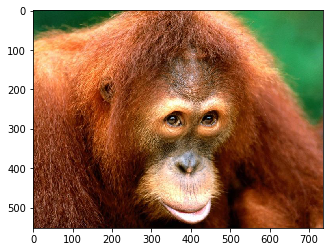

In [133]:
img = plt.imread(f'{PATH}\\valid\\{class1}\\{files[0]}')
plt.imshow(img);

In [134]:
img.shape

(552, 736, 3)

In [135]:
img[:4,:4]

array([[[ 9, 73, 36],
        [ 9, 73, 36],
        [10, 74, 37],
        [10, 74, 37]],

       [[12, 76, 39],
        [12, 76, 39],
        [12, 76, 39],
        [12, 76, 39]],

       [[13, 77, 40],
        [13, 77, 40],
        [13, 77, 40],
        [13, 77, 40]],

       [[13, 77, 40],
        [13, 77, 40],
        [12, 76, 39],
        [12, 76, 39]]], dtype=uint8)

In [136]:
# Uncomment the below if you need to reset your precomputed activations
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [137]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:57<00:00, 25.30s/it]


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.404241   0.126805   0.956098  
    1      0.240999   0.083027   0.973171                                                                              
    2      0.171054   0.080332   0.97561                                                                               


[array([0.08033]), 0.975609756097561]

In [138]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 

In [139]:
# from here we know that class2 is label 0 and class1 is label 1.
data.classes

['Lemur animal', 'Monkey animal']

In [140]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(410, 2)

In [141]:
log_preds[:10]

array([[ -0.00553,  -5.20027],
       [ -0.0001 ,  -9.24784],
       [ -0.00003, -10.56675],
       [ -0.00321,  -5.74198],
       [ -0.00075,  -7.19062],
       [ -0.01239,  -4.39709],
       [ -0.00006,  -9.77376],
       [ -0.00413,  -5.49132],
       [ -0.00002, -10.63953],
       [ -0.00031,  -8.08661]], dtype=float32)

In [142]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(class2)

In [143]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [144]:
def  plot_val_with_titleplot_val (idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [145]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [146]:
def load_img_id(ds, idx): return np.array(Image.open(PATH+"\\"+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


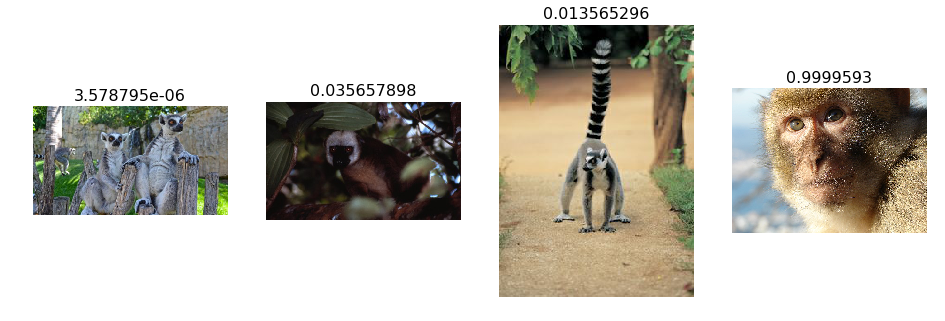

In [147]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


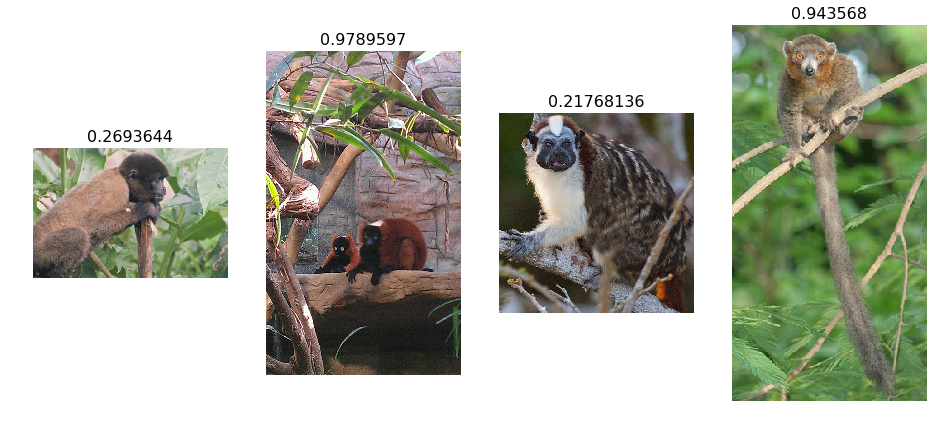

In [148]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [149]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct Lemur animals


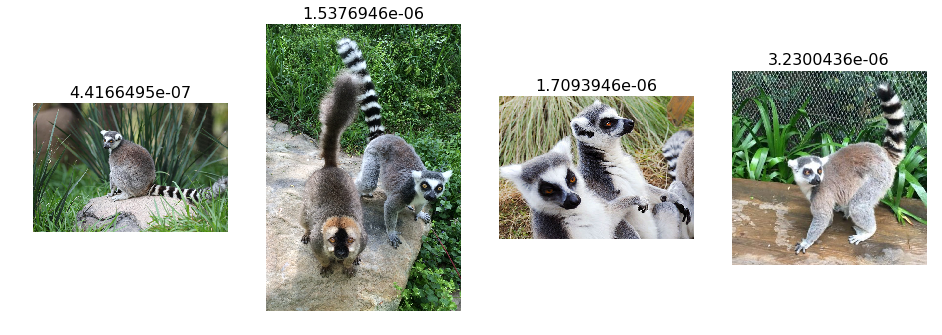

In [150]:
plot_val_with_title(most_by_correct(0, True), f"Most correct {class2}s")

Most incorrect Lemur animals


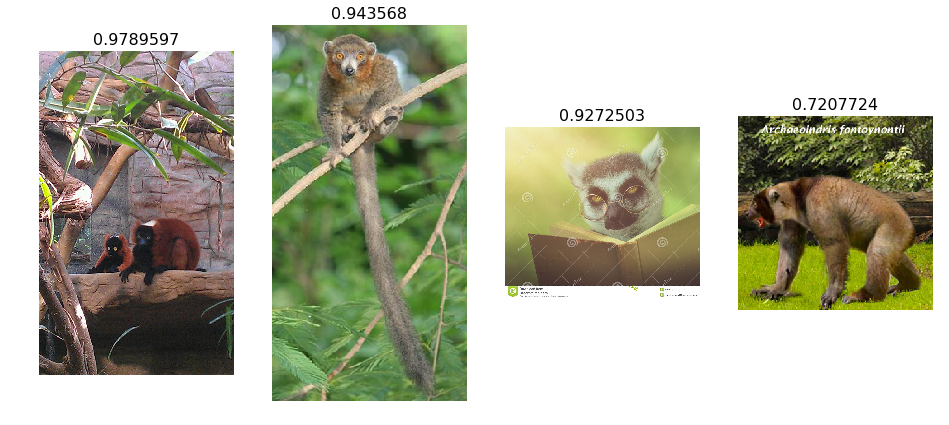

In [151]:
plot_val_with_title(most_by_correct(0, False), f"Most incorrect {class2}s")

Most correct Monkey animals


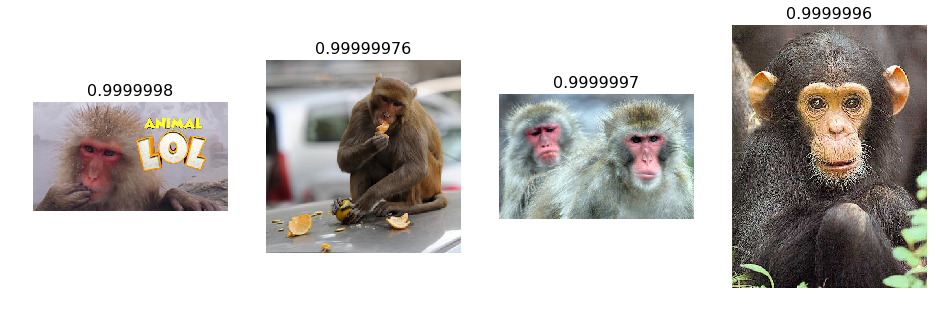

In [152]:
plot_val_with_title(most_by_correct(1, True), f"Most correct {class1}s")

Most incorrect Monkey animals


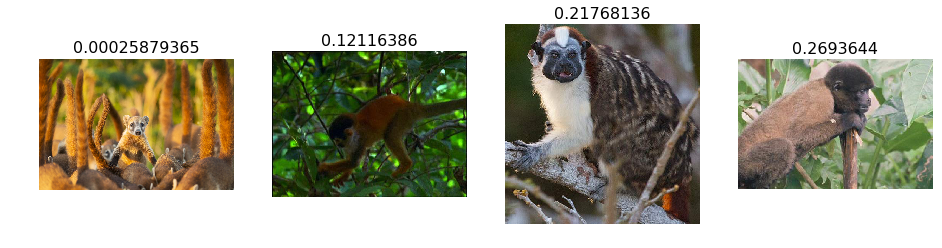

In [153]:
plot_val_with_title(most_by_correct(1, False), f"Most incorrect {class1}s")

Most uncertain predictions


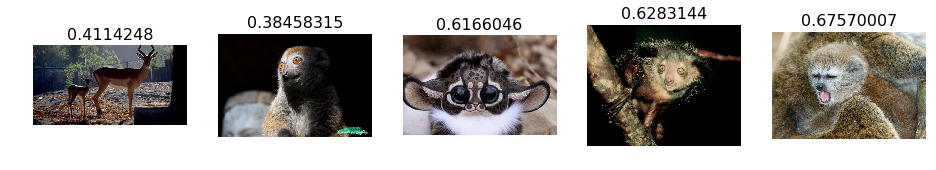

In [154]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:5]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [155]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [156]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.005027   67.243002  0.939024  


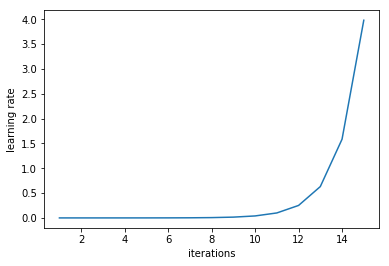

In [157]:
learn.sched.plot_lr()

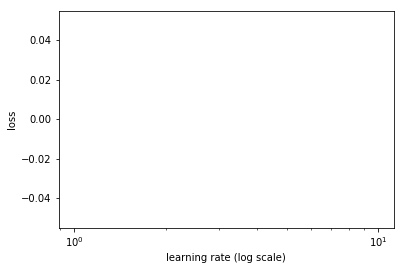

In [158]:
learn.sched.plot()

In [159]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [160]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [161]:
ims = np.stack([get_augs() for i in range(6)])

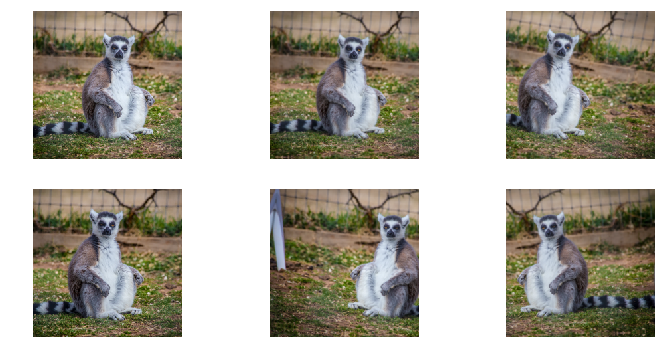

In [162]:
plots(ims, rows=2)

In [163]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [164]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.375784   0.140134   0.956098  


[array([0.14013]), 0.9560975609756097]

In [165]:
learn.precompute=False

In [166]:
learn.fit(1e-2, 3, cycle_len=1)

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]


Exception in thread Thread-35:
Traceback (most recent call last):
  File "C:\Users\Perseo\Anaconda3\envs\fastai-cpu\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\Perseo\Anaconda3\envs\fastai-cpu\lib\site-packages\tqdm\_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "C:\Users\Perseo\Anaconda3\envs\fastai-cpu\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.170281   0.107875   0.968293  
    1      0.145393   0.081802   0.97561                                                                               
    2      0.126335   0.074369   0.978049                                                                              



[array([0.07437]), 0.9780487804878049]

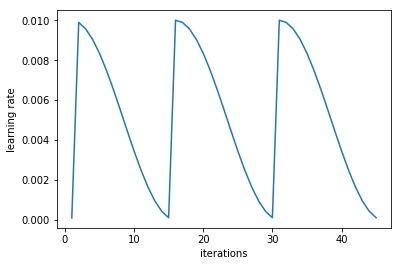

In [167]:
learn.sched.plot_lr()

In [168]:
learn.save('224_lastlayer')

In [169]:
learn.load('224_lastlayer')

In [170]:
learn.unfreeze()

In [171]:
lr=np.array([1e-4,1e-3,1e-2])

In [172]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.176659   0.093438   0.978049  
    1      0.15711    0.083362   0.973171                                                                              
    2      0.132002   0.081029   0.973171                                                                              
    3      0.11522    0.079222   0.970732                                                                              
    4      0.094644   0.074978   0.973171                                                                              
    5      0.082566   0.072758   0.97561                                                                               
    6      0.075032   0.072575   0.97561                                                                               



[array([0.07257]), 0.975609756097561]

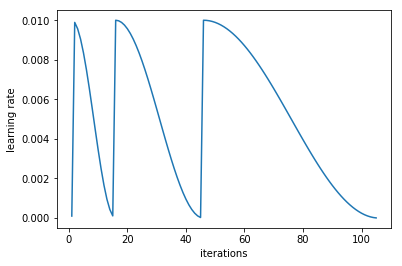

In [173]:
learn.sched.plot_lr()

In [174]:
learn.save('224_all')

In [175]:
learn.load('224_all')

In [176]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [177]:
accuracy_np(probs, y)

0.973170731707317

In [178]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [179]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[202   7]
 [  4 197]]


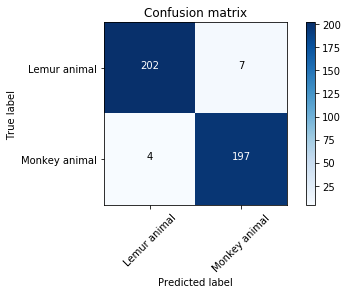

In [180]:
plot_confusion_matrix(cm, data.classes)

Most incorrect Lemur animals


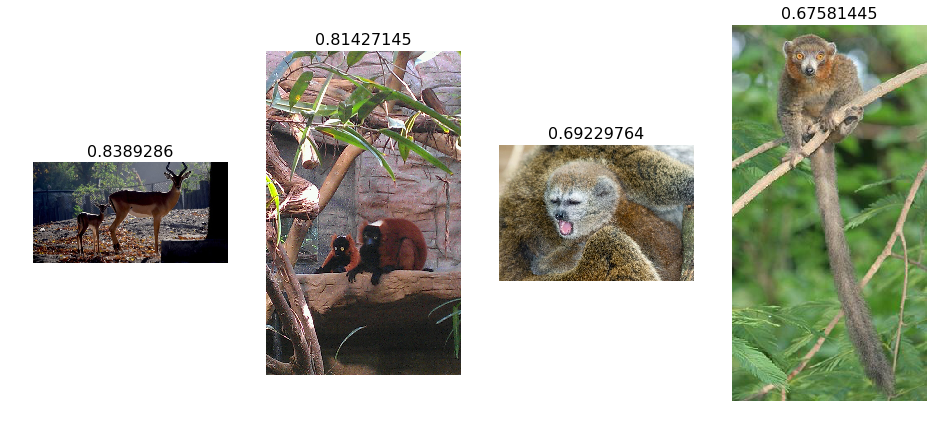

In [185]:
plot_val_with_title(most_by_correct(0, False), f"Most incorrect {class2}s")

Most incorrect Monkey animals


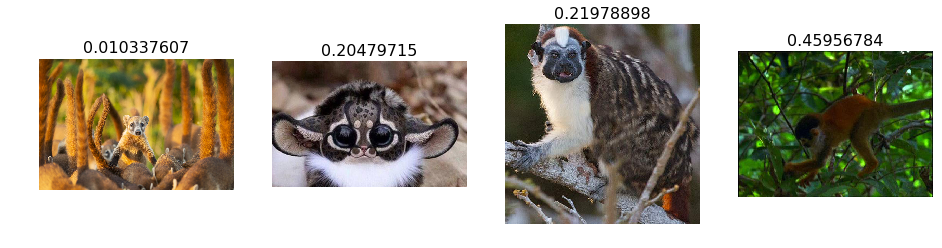

In [184]:
plot_val_with_title(most_by_correct(1, False), f"Most incorrect {class1}s")